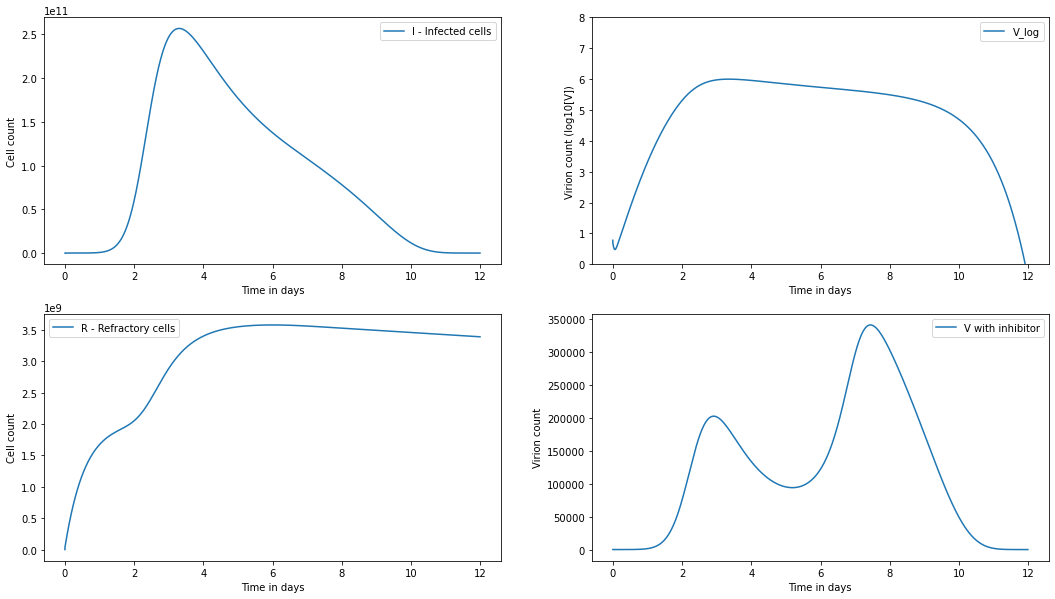

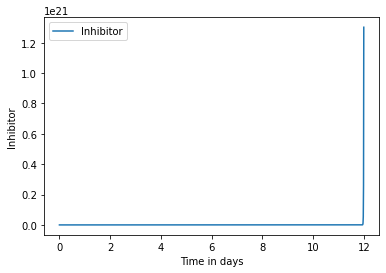

In [6]:
import numpy as np
import pylab as pl
from scipy.integrate import odeint
# #Here the Parameters are defined (Pony 1)
# #ORIGINAL PARAMETERS
# b = 8.3*10**-6
# fi = 6.9*10**-2
# ro = 1*10**-2
# dltI = 2
# k = 1.6
# p = 7.7*10**-5
# c = 20
# q = 6.1*10**-10
# d = 0.85
# # exponential function for the immune response
# mhy = 6 #this is the adaptive immune system for pony 2 but it fits Pony 1 better
# sig = 1
# dltA = dltI
#-------------------------------------------------------------------------
#INNATE IMMUNOSUPPRESSION
b = 8.3*10**-6
fi = 1*10**-2 #ch
ro = 1*10**-2
dltI = 2
k=0.2 #ch
p = 7.7*10**-5
c=20
q =1.2*10**-11 #ch
d=1.7 #ch
# exponential function for the immune response
mhy=10 #this is the adaptive immune system for pony 2 but it fits Pony 1 better
sig=1
dltA=dltI
#-----------------------------------------------------------
# #ADAPTIVE IMMUNOSUPPRESSION
# b = 1.7*10**-5 #ch
# fi = 6.9*10**-2
# ro = 1*10**-2
# dltI = 2
# k = 1.6
# p = 7.7*10**-5
# c = 20
# q = 6.1*10**-10
# d = 0.85
# # exponential function for the immune response
# mhy = 6 #this is the adaptive immune system for pony 2 but it fits Pony 1 better
# sig = 0.3 #ch
# dltA = dltI
#-----------------------------------------------------
# # BOTH IMMUNOSUPPRESSIONS
# b = 1.7*10**-5 #ch
# fi = 6.9*10**-2
# ro = 1*10**-2
# dltI = 2
# k = 1.6
# p = 7.7*10**-5
# # c=5 #ch
# c=20
# q =1.2*10**-11 #ch
# d=1.7 #ch
# # exponential function for the immune response
# mhy=10 #this is the adaptive immune system for pony 2 but it fits Pony 1 better
# sig=0.3 #ch
# dltA=dltI
#-----------------------------------------------------------
#TREATMENT PARAMETERS
dlInf = 1
#Neuraminidase activity parameters
In = 0.2*10**-5
k1 = 3
n = 2
# exponential function for the immune response
variable = 6
dlIn = dlInf
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Here the ODE System is defined
def f(xy):
# Original system
#     T, I, R, V, F = xy
#     Tp = -b*V*T - fi*F*T + ro*R
#     Ip = b*V*T -dltA*I -k*I*F
#     Rp = fi*F*T - ro*R
#     Vp = p*I -c*V
#     Fp = q*I -d*F
#     return np.array([Tp, Ip, Rp, Vp, Fp])
    # Treatment taken into account
    T, I, R, V, In, V2, F = xy
    Tp = -b*V2*T - fi*F*T + ro*R
    Ip = b*V2*T -dltA*I -k*I*F 
    Rp = fi*F*T - ro*R
#     V2=V #Only used when simulating the immunosuppression without treatment
    V1p = p*I -c*V #Only used when simulating the immunosuppression without treatment
    Inp = 2 - dlIn*In 
    V2p = (p/(1+(In/k1)**n))*I -c*V2 
    Fp = q*I -d*F
    return np.array([Tp, Ip, Rp, V1p, Inp, V2p, Fp])

# Solving the ODE using Heun's method
Tmax =12    #time in days
dt = 0.01    # integration time step
dt2 = dt/2
# xy = np.array([3.5*10**11, 0, 0, 6, 1]) # Value for Viral load is just chosen by looking at the graph
xy = np.array([3.5*10**11, 0, 0, 6, 0, 6, 1])
tvec = np.arange(0,Tmax,dt)
tvec2 = np.zeros(1)
xy_out = xy
for i in range(tvec.size):
    dltA=dltI*np.exp(sig*((i*Tmax)/tvec.size-mhy))
    dlIn=dlInf*np.exp(sig*((i*Tmax)/tvec.size-variable))
    xyi = xy + dt*f(xy)          
    xy = xy + dt2*(f(xy)+f(xyi)) 
    xy_out = np.vstack([xy_out,xy])
    tvec2 = np.vstack([tvec2,tvec[i]]) 

#Imunosuppression plots
fig, pos = pl.subplots(2,2, figsize = (18,10))

# #pl.plot(tvec2,xy_out[:,0],label='T')
pos[0,0].plot(tvec2,xy_out[:,1],label='I - Infected cells')
pos[1,0].plot(tvec2,xy_out[:,2],label='R - Refractory cells')
pos[0,1].plot(tvec2,np.log10(xy_out[:,3]),label='V_log')
# pos[1,1].plot(tvec2,xy_out[:,3],label='V no inhibitor')
pos[1,1].plot(tvec2,xy_out[:,5],label='V with inhibitor')
pos[0,1].set_ylim(0,8)
# pos[1,1].set_ylim(0,150000)
# #pl.plot(tvec2,xy_out[:,4],label='F')
pos[0,0].legend()
pos[1,0].legend()
pos[0,1].legend()
pos[1,1].legend()

pos[0,0].set_xlabel('Time in days')
pos[1,0].set_xlabel('Time in days')
pos[0,1].set_xlabel('Time in days')
pos[1,1].set_xlabel('Time in days')
pos[0,0].set_ylabel('Cell count')
pos[0,1].set_ylabel('Virion count (log10[V])')
pos[1,0].set_ylabel('Cell count')
pos[1,1].set_ylabel('Virion count')
pl.show()

#Treatment plot
pl.plot(tvec2,((xy_out[:,4])),label='Inhibitor')
pl.legend()
pl.xlabel('Time in days')
pl.ylabel('Inhibitor')
pl.show()
